In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('student-mat.csv')

In [3]:
data.shape
pd.options.display.max_columns=33

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

Text(0.5, 1.0, 'Rozdelenie znamok')

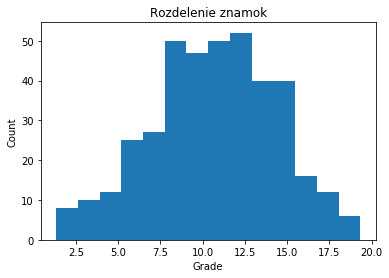

In [6]:
plt.hist(data['GAvg'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Rozdelenie znamok')


In [7]:
def define_grade(data):
    presiel = []
   
    for row in data['GAvg']:
              
        if row >= (0.50 * data['GAvg'].max()):
            presiel.append('1')
        elif row < (0.50 * data['GAvg'].max()):
            presiel.append('0')   
    data['presiel'] = presiel
    return data

In [8]:
data = define_grade(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,presiel
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,...,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,...,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,...,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,...,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,...,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,0


In [9]:
#Úprava mapovaním
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)

d = {'U': 1, 'R': 0}
data['address'] = data['address'].map(d)

d = {'LE3': 1, 'GT3': 0}
data['famsize'] = data['famsize'].map(d)

d = {'T': 1, 'A': 0}
data['Pstatus'] = data['Pstatus'].map(d)

d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data['Mjob'] = data['Mjob'].map(d)

data['Fjob'] = data['Fjob'].map(d)

d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data['reason'] = data['reason'].map(d)

d = {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(d)


In [10]:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)
data['famsup'] = data['famsup'].map(d)
data['paid'] = data['paid'].map(d)
data['activities'] = data['activities'].map(d)
data['nursery'] = data['nursery'].map(d)
data['higher'] = data['higher'].map(d)
data['internet'] = data['internet'].map(d)
data['romantic'] = data['romantic'].map(d)


In [11]:
#Zistenie kolerácie dát s premennou GAvg
category_data = data.drop(columns=['presiel'])
dummy_data = pd.get_dummies(category_data)
dummy_data['GAvg'] = data['GAvg']
dummy_data.corr()['GAvg'].sort_values()
#čím bližšie k -1 a 1 tym je medzi dátami väčie prepojenie/kolerácia

failures     -0.375759
Mjob         -0.169193
goout        -0.154511
schoolsup    -0.137644
age          -0.134589
traveltime   -0.128197
Fjob         -0.122221
romantic     -0.102731
sex          -0.101122
Walc         -0.088025
health       -0.080380
Dalc         -0.072508
famsup       -0.061553
school_MS    -0.043285
Pstatus      -0.043048
guardian     -0.031029
reason       -0.023689
absences     -0.005909
freetime      0.003773
famrel        0.021653
activities    0.040859
school_GP     0.043285
nursery       0.065145
famsize       0.082560
paid          0.089511
internet      0.102628
address       0.107297
studytime     0.134565
Fedu          0.175852
higher        0.189483
Medu          0.224260
G1            0.919386
G3            0.959873
G2            0.967999
GAvg          1.000000
Name: GAvg, dtype: float64

In [12]:
def format_data(data):
    
    labels = data['presiel']       
    data = data.drop(columns=['G1', 'G2', 'G3','presiel'])
    
    # Kolerácia
    data = pd.get_dummies(data)       
    most_correlated = data.corr().abs()['GAvg'].sort_values(ascending=False)
    # Ponecha 5 najviac ovplyvnujúcich stĺpcov
    most_correlated = most_correlated[:7]
    data = data.loc[:, most_correlated.index]
    data = data.drop(columns = 'GAvg')
    
    X=data
    y=labels
    return X, y

In [13]:
X, y= format_data(data)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

#vytvorenie modelu
model = Sequential()

n_cols = X_train.shape[1]

#pridanie neurových vrstiev
model.add(Dense(12, input_dim=n_cols, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


Using TensorFlow backend.


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



In [22]:
accur=model.fit(X_train, y_train,epochs=100)


Epoch 1/100
316/316 [==============================] - 0s 130us/step - loss: 0.1955 - acc: 0.7184
Epoch 2/100
316/316 [==============================] - 0s 72us/step - loss: 0.1956 - acc: 0.7184
Epoch 3/100
316/316 [==============================] - 0s 54us/step - loss: 0.1944 - acc: 0.7184
Epoch 4/100
316/316 [==============================] - 0s 90us/step - loss: 0.1945 - acc: 0.7247
Epoch 5/100
316/316 [==============================] - 0s 58us/step - loss: 0.1947 - acc: 0.7215
Epoch 6/100
316/316 [==============================] - 0s 47us/step - loss: 0.1942 - acc: 0.7215
Epoch 7/100
316/316 [==============================] - 0s 91us/step - loss: 0.1938 - acc: 0.7215
Epoch 8/100
316/316 [==============================] - 0s 54us/step - loss: 0.1934 - acc: 0.7278
Epoch 9/100
316/316 [==============================] - 0s 56us/step - loss: 0.1932 - acc: 0.7247
Epoch 10/100
316/316 [==============================] - 0s 60us/step - loss: 0.1930 - acc: 0.7278
Epoch 11/100
316/316 [======

316/316 [==============================] - 0s 57us/step - loss: 0.1818 - acc: 0.7373
Epoch 85/100
316/316 [==============================] - 0s 96us/step - loss: 0.1826 - acc: 0.7215
Epoch 86/100
316/316 [==============================] - 0s 112us/step - loss: 0.1822 - acc: 0.7310
Epoch 87/100
316/316 [==============================] - 0s 90us/step - loss: 0.1827 - acc: 0.7342
Epoch 88/100
316/316 [==============================] - 0s 67us/step - loss: 0.1819 - acc: 0.7310
Epoch 89/100
316/316 [==============================] - 0s 52us/step - loss: 0.1818 - acc: 0.7310
Epoch 90/100
316/316 [==============================] - 0s 59us/step - loss: 0.1820 - acc: 0.7310
Epoch 91/100
316/316 [==============================] - 0s 64us/step - loss: 0.1817 - acc: 0.7310
Epoch 92/100
316/316 [==============================] - 0s 60us/step - loss: 0.1814 - acc: 0.7278
Epoch 93/100
316/316 [==============================] - 0s 63us/step - loss: 0.1818 - acc: 0.7278
Epoch 94/100
316/316 [==========

In [23]:
test_y_predictions = model.predict(X_test)
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

316/316 [==============================] - 0s 37us/step
acc: 72.78%


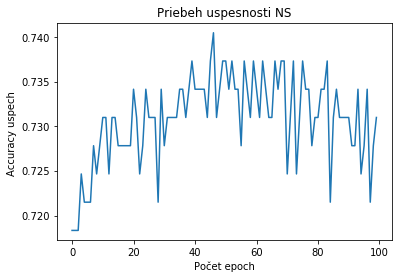

In [24]:
plt.plot(accur.history['acc'])
plt.title('Priebeh uspesnosti NS')
plt.xlabel('Počet epoch')
plt.ylabel('Accuracy uspech ')
plt.show()

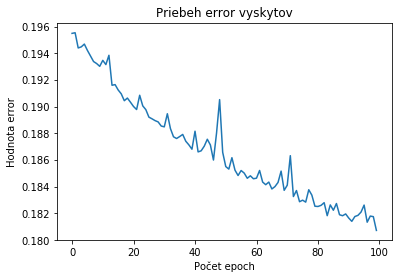

In [25]:
plt.plot(accur.history['loss'])
plt.title('Priebeh error vyskytov')
plt.xlabel('Počet epoch')
plt.ylabel('Hodnota error')
plt.show()

In [21]:
test_y_predictions

array([[-0.14977027],
       [ 0.15990123],
       [ 0.642001  ],
       [ 0.63804275],
       [ 0.78012675],
       [ 0.6176471 ],
       [ 0.8211705 ],
       [ 0.53337276],
       [ 0.4266047 ],
       [ 0.42548624],
       [ 0.6150568 ],
       [ 0.57912576],
       [ 0.67522633],
       [ 0.6479972 ],
       [ 0.67522633],
       [ 0.47219825],
       [ 0.24334928],
       [ 0.40472764],
       [ 0.7279668 ],
       [ 0.65245414],
       [ 0.7998685 ],
       [ 0.62656564],
       [ 0.73914117],
       [ 0.58513284],
       [ 0.6362802 ],
       [ 0.25022042],
       [ 0.801914  ],
       [ 0.6513414 ],
       [ 0.83984745],
       [ 0.62656564],
       [ 0.47242153],
       [ 0.81481844],
       [ 0.72314423],
       [ 0.8159979 ],
       [ 0.44290128],
       [ 0.4359661 ],
       [ 0.6278079 ],
       [ 0.6479972 ],
       [ 0.65442735],
       [ 0.684962  ],
       [ 0.75427574],
       [ 0.6349545 ],
       [ 0.7513089 ],
       [ 0.81006545],
       [ 0.63778454],
       [ 0